In [177]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [178]:
file = r'/Users/richard/Documents/WSC - variable cross-check_v1.xlsx'
data = r'/Users/richard/Downloads/wsc-dataset-0.2.0.csv'

In [179]:
# Had to add the nrows variable as the Excel was pulling in 1,000s of rows for some reason
df = pd.read_excel(file)
data_df = pd.read_csv(data)

In [180]:
df.tail()

,Unnamed: 0,Check,Patient input,Dr Input,Calculated,Feature,Target,Proposed Removal,Action to take,Composite,Unnamed: 10
234,se,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN
235,waso,NaN,NaN,D,NaN,NaN,T,NaN,NaN,NaN,NaN
236,mean_desat_perc,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN
237,mean_desat_dur,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN
238,cvd_stroke_death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
data_df.head()

,wsc_id,wsc_vst,vst_year,sex,age,race,education_survey1,creatinine,glucose,hdl,...,pcttstrem,avgo2sattst,minsao2tst,ptstl90,sleep_latency,rem_latency,se,waso,mean_desat_perc,mean_desat_dur
0,10119,1,2003,M,52,5,6.0,0.9,89.0,52.0,...,10.5,96.7,93.8,0.0,7.0,87.0,83.0,65.0,3.42,27.4
1,10119,2,2008,M,58,5,6.0,0.8,95.0,36.0,...,10.8,96.9,86.4,0.0,4.0,145.5,93.3,27.0,3.65,31.0
2,10191,1,2001,F,50,5,5.0,0.8,96.0,77.0,...,30.8,97.2,94.2,0.0,7.0,117.0,87.1,44.0,3.70,29.1
3,10191,2,2004,F,53,5,5.0,0.7,74.0,104.0,...,22.5,96.6,85.9,0.0,5.0,95.0,85.4,62.5,3.62,37.9
4,10198,1,2003,F,57,5,4.0,0.9,103.0,48.0,...,18.1,95.3,87.2,0.7,7.0,109.5,83.7,58.0,4.12,37.0


In [182]:
deleted = df[df['Proposed Removal'] == 'R']
deleted_cols = deleted.iloc[:, 0]

In [183]:
deleted_cols.to_list()

['vst_year',
 'arm_left1',
 'arm_left2',
 'arm_right1',
 'arm_right2',
 'ankle_left1',
 'ankle_left2',
 'ankle_right1',
 'ankle_right2',
 'sit_sys_repeat',
 'sit_dia_repeat',
 'arm_left_repeat',
 'arm_right_repeat',
 'ankle_left_repeat',
 'ankle_right_repeat',
 'sit_sys_repeat2',
 'sit_dia_repeat2',
 'arm_left_repeat2',
 'arm_right_repeat2',
 'ankle_left_repeat2',
 'ankle_right_repeat2',
 'ep1',
 'ep2',
 'ep3',
 'ep4',
 'ep5',
 'ep6',
 'ep7',
 'ep8',
 'zung1_scored',
 'zung2_scored',
 'zung3_scored',
 'zung4_scored',
 'zung5_scored',
 'zung6_scored',
 'zung7_scored',
 'zung8_scored',
 'zung9_scored',
 'zung10_scored',
 'zung11_scored',
 'zung12_scored',
 'zung13_scored',
 'zung14_scored',
 'zung15_scored',
 'zung16_scored',
 'zung17_scored',
 'zung18_scored',
 'zung19_scored',
 'zung20_scored',
 'smoker',
 'totsleepnap',
 'ps_diff',
 'ps_backsleep',
 'ps_wakerepeat',
 'ps_tooearly',
 'ps_notrested',
 'ps_wakeup',
 'ps_nightmare',
 'ninsomnia',
 'ninsomniadays',
 'nasal_cong_today',
 'n

In [184]:
data_df = data_df.drop(deleted_cols.to_list(), axis=1)

In [185]:
data_df.isnull().sum().sort_values(ascending=False)/len(data_df)

psg_oxygen         0.997665
psg_cpap           0.935019
cigars_day         0.919844
bowls_day          0.917899
thyroid_problem    0.867704
                     ...   
coronary_ynd       0.000000
awake_freq         0.000000
apnea_freq         0.000000
choke_freq         0.000000
waso               0.000000
Length: 134, dtype: float64

In [186]:
numerical_types = ['float64', 'int64']

wsc_id


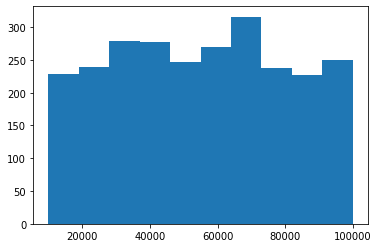

wsc_vst


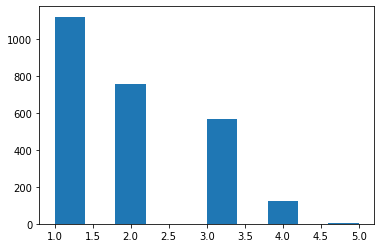

age


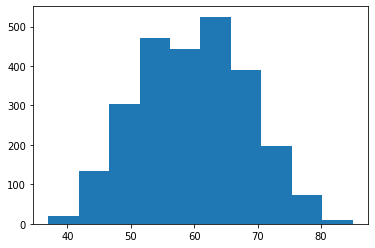

race


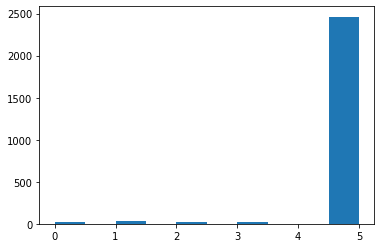

education_survey1


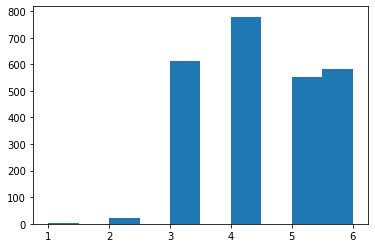

creatinine


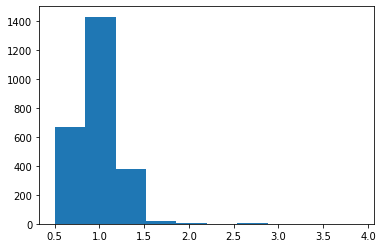

glucose


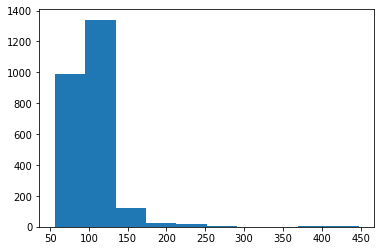

In [ ]:
for col in data_df.select_dtypes(include=np.number):
    print(col)
    plt.hist(data_df[col])
    plt.show();

In [ ]:
imbalanced_classes = []
for col in data_df.columns:
    _ = data_df.columns.get_loc(col)
    if data_df.iloc[:, _].value_counts(normalize=True).head(1).values > 0.9:
        imbalanced_classes.append((col, data_df.iloc[:, _].value_counts(normalize=True).head(1).values.astype(float)))

In [ ]:
imbalanced_classes

In [ ]:
for col in imbalanced_classes:
    print(col[0])
    plt.hist(data_df[col[0]])
    plt.show();

In [ ]:
for col in imbalanced_classes:
    print(col[0])